import pymc3 as pm
import numpy as np

basic_model = pm.Model()

y_obs = np.random.random(500)

with basic_model:
    b = pm.Normal("normal1", -10, 1)
    y = pm.Normal("normal2", b, 1, observed = y_obs)
    traces = pm.sample()
    print(pm.summary(traces))
    print(pm.find_MAP())

In [1]:
import pymc3 as pm
import numpy as np
import scipy
from matplotlib import pyplot as plt

basic_model = pm.Model()

y_obs = np.array([1, -1, 2, 5, 7])
mean_z = 0
std_z = 1
std_y = 1

with basic_model:
    z = pm.Normal("z", mean_z, std_z)
    y = pm.Normal("y", z, std_y, observed = y_obs)
    
    trace = pm.sample()
    pm.plots.traceplot(trace)
    
summary = pm.stats.summary(trace)
summary

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 4643.15draws/s]
The acceptance probability does not match the target. It is 0.8851514770323047, but should be close to 0.8. Try to increase the number of tuning steps.
/home/hotohoto/playground/pp_research/venv/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
z,2.379225,0.421203,0.014201,1.587534,3.231931,802.08308,1.000785


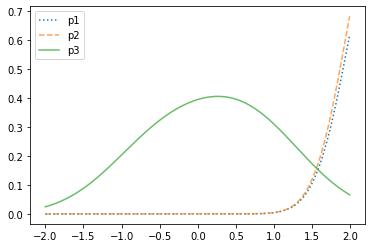

In [2]:
p1 = scipy.stats.norm(summary['mean'], summary['sd']).pdf

def p2 (x):
    prior = scipy.stats.norm(mean_z, std_z).pdf(x)
    tmp = np.array([scipy.stats.norm(x, std_y).pdf(y_obs[i]) for i in range(y_obs.shape[0])])
    likelihood = np.prod(tmp, axis=0)
    return likelihood * prior

def p3 (x):
    prior = scipy.stats.norm(mean_z, std_z).pdf(x)
    tmp = np.array([scipy.stats.norm(x, std_y).pdf(y_obs[i]) for i in range(y_obs.shape[0])])
    likelihood = np.mean(tmp, axis=0)
    return likelihood * prior

x_range = np.arange(-2, 2, 0.01)
y1 = p1(x_range)
y2 = p2(x_range)/scipy.integrate.quad(p2, -20, 20)[0]
y3 = p3(x_range)/scipy.integrate.quad(p3, -20, 20)[0]

plt.plot(x_range, y1, ":", label='p1')
plt.plot(x_range, y2, "--", label='p2', alpha=0.7)
plt.plot(x_range, y3, "", label='p3', alpha=0.7)
plt.legend(loc='best')